In [1]:
def SubtreePoly(S,x): #Input S is tree, input x is variable for polynomial, output is subtree polynomial
    D={}
    P=0;
    T=S.copy();
    for v in T.vertices():
        D[v]=x;
    while T.order()>1:
        for v in T.vertices():
            if T.degree(v)==1:
                u=v;
                break;
        w=T[u][0];
        D[w]=expand(D[w]*(D[u]+1));
        P=P+D[u];
        T.delete_vertex(u);
    return P+D[T.vertices()[0]];

def Mean(G): #Input is subtree, output is mean subtree order
    P=SubtreePoly(G,x)
    Q=derivative(P,x);
    M=Q.substitute(x=1)/P.substitute(x=1);
    return M;

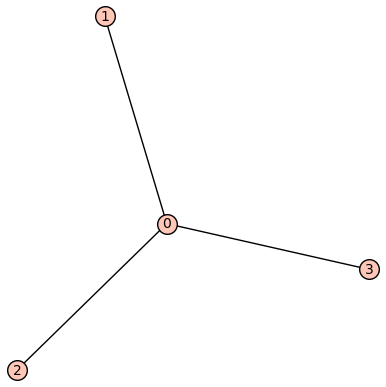

(0, 1)


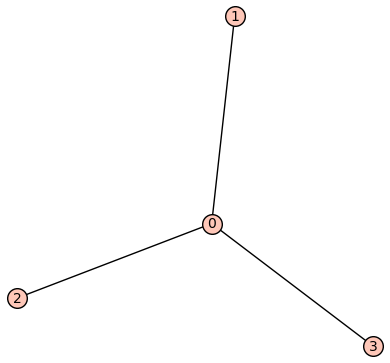

(0, 2)


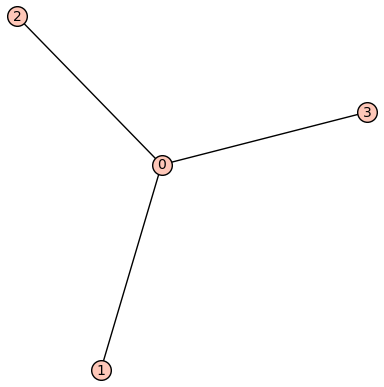

(0, 3)


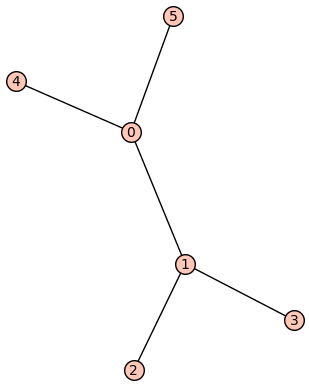

(0, 1)


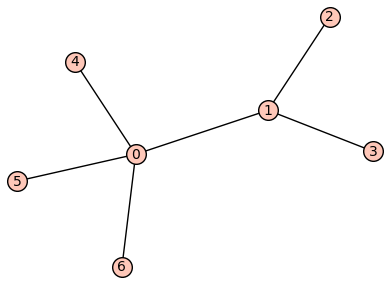

(0, 1)


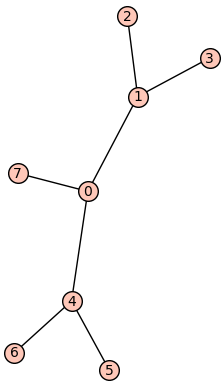

(0, 1)


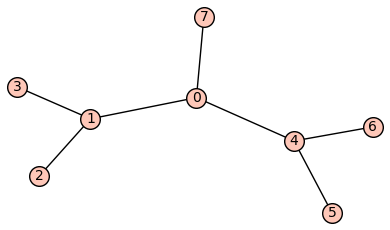

(0, 4)


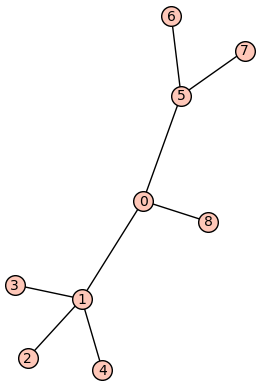

(0, 5)


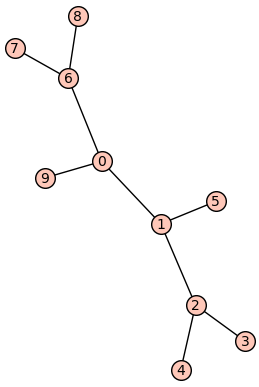

(0, 1)


In [4]:
#print all pairs (g,e) where g is a graph for which contracting the edge e does not result in a change of mean of at least 0.5

for n in range(3,19):
    G=[]
    for g in graphs.trees(n):
        if 2 not in g.degree_sequence():
            G.append(g)

    for g in G:
        for e in g.edges(labels=False):
            h=g.copy()
            h.contract_edge(e)
            if Mean(h)+0.5>Mean(g):
                g.show()
                print(e)

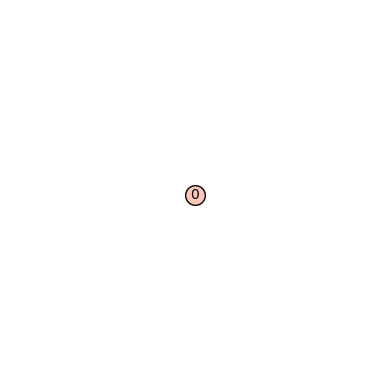

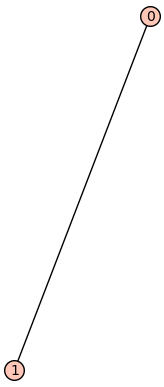

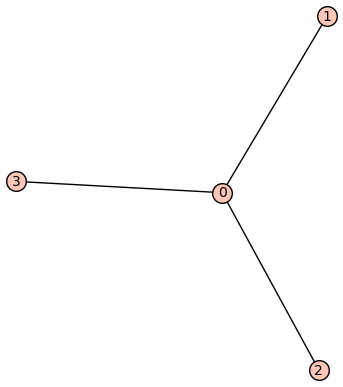

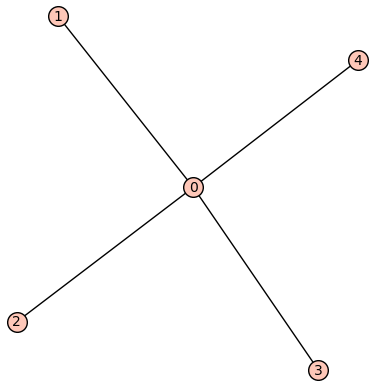

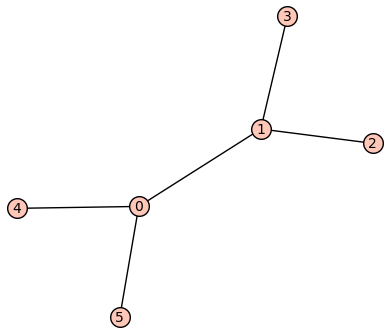

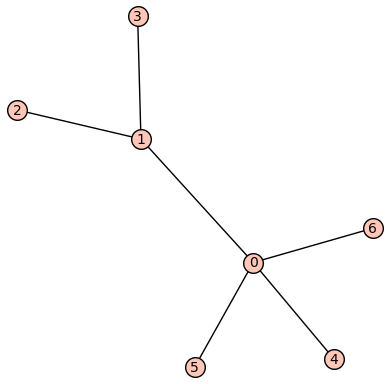

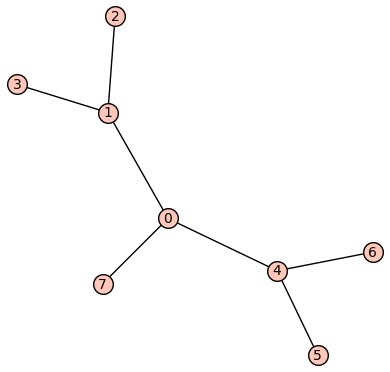

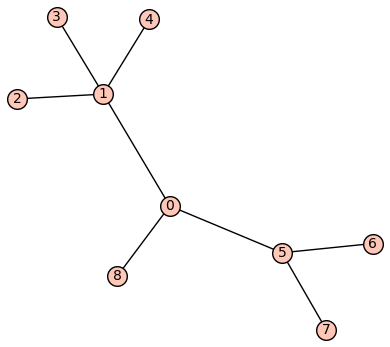

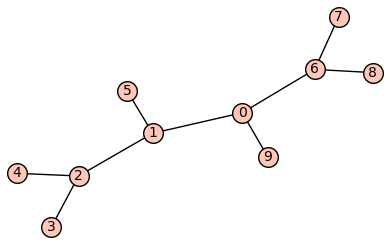

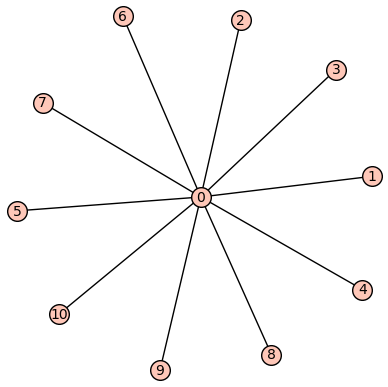

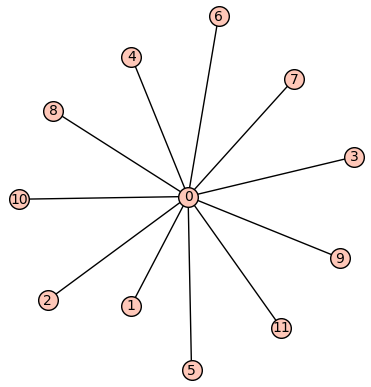

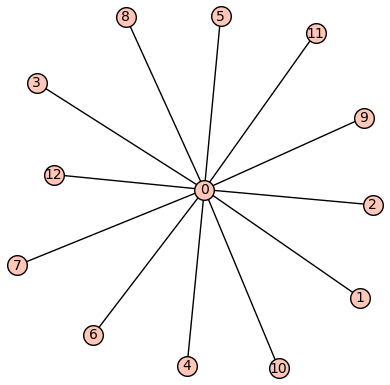

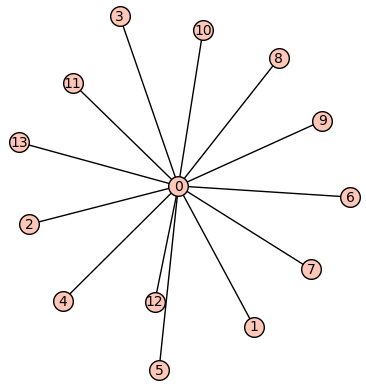

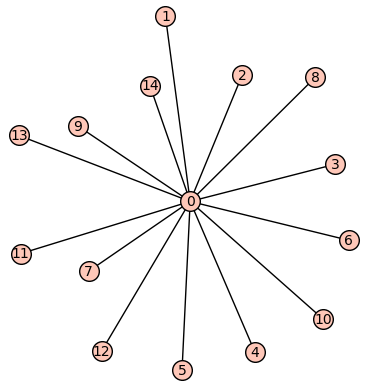

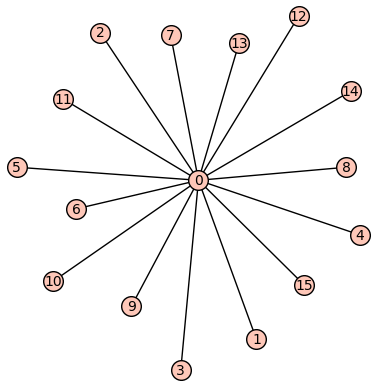

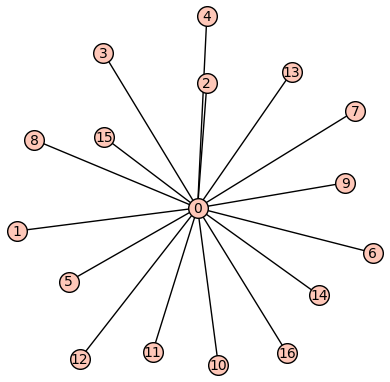

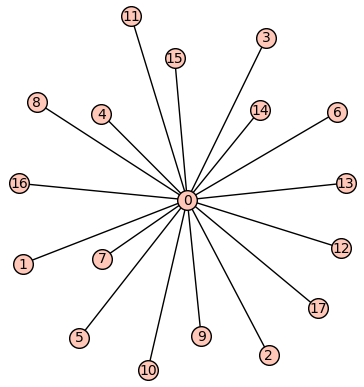

In [3]:
#for order n up to 11, print the series-reduced tree with minimum subtree order,
#and print the graphs whose mean order is lower than (n+1)/2 for graphs of order 11<n<19

for n in range(1,12):
    G=[]
    for g in graphs.trees(n):
        if 2 not in g.degree_sequence():
            G.append(g)
    Min=n;
    H=[]
    for g in G:
        if Mean(g)==Min:
            H.append(g)
        if Mean(g)<Min:
            Min=Mean(g);
            H=[g]
    for h in H:
        h.show()

for n in range(12,19):
    G=[]
    for g in graphs.trees(n):
        if 2 not in g.degree_sequence():
            G.append(g)

    for g in G:
        if Mean(g)<(n+1)/2:
            g.show()
